In [1]:
# min, max values; range; correlation

import statistics # some functions: mean()  geometric_mean, harmonic_mean() median_low multimode etc
import pandas as pd
import matplotlib.pyplot as plt

Some exercises


In [2]:
import statistics
import numpy as np

datasetX = [1,5,5,2,6,45,87,92,0]


meanX = statistics.mean(datasetX)
print(meanX)

dev = statistics.stdev(datasetX)
print(dev)



meanX_np= np.mean(datasetX)
print(meanX_np)

dev_np = np.std(datasetX)
print(dev_np)


# Cuidaod, vemos que para std deviation hay diferencias!! Por defecto the degree of freedomm es diferente para numpy y para statistics

27
38.05916446797013
27.0
35.88252437546104


Exercises with pandas

In [3]:
import pandas as pd

numseries = pd.Series(datasetX)

print(numseries.describe()) # nos da unpoco de info sobre el tip de data
print("------\n", numseries)  # me da el index a la izq y luego el valor 

count     9.000000
mean     27.000000
std      38.059164
min       0.000000
25%       2.000000
50%       5.000000
75%      45.000000
max      92.000000
dtype: float64
------
 0     1
1     5
2     5
3     2
4     6
5    45
6    87
7    92
8     0
dtype: int64


Start mini project

In [4]:
# import csv file
players = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\Coursera - Intro to statistics Python\\players.csv")

print(players["salary"].describe()) # vamos  usar la funcíon describe para ver std deviation mínimos etc  dentro de la columna salary

print("-----\n----\n",players.describe()) 


## now we are going to get the variance of the salary column

variance = players["salary"].var()
print("-----\n----\nvariance of salary column is ", variance)


count     20.000000
mean     530.550000
std      276.579574
min      125.000000
25%      315.250000
50%      441.000000
75%      800.000000
max      966.000000
Name: salary, dtype: float64
-----
----
            salary     rating
count   20.000000  20.000000
mean   530.550000   4.950000
std    276.579574   2.762055
min    125.000000   1.000000
25%    315.250000   2.750000
50%    441.000000   4.000000
75%    800.000000   7.000000
max    966.000000  10.000000
-----
----
variance of salary column is  76496.2605263158


In [8]:
# correlation

column1 = players["salary"]
column2 = players["rating"]

correlation = column1.corr(column2) #corr es correlación, va de -1 a 1, si es 1 es que hay una gran correlación 
print("correlation between salary and rating ", correlation)


# esto ya no funciona en esta versión
#print("Correlación del df", players.corr()) # ver correlación dentro del df


## tipos

print("Correlation de Pearson :", players.corr(method="pearson"))

print("\n\nCorrelation de Spearman \n",players.corr(method="spearman")) # deprecated 

correlation between salary and rating  0.9612748378992164
Correlation de Pearson :           salary    rating
salary  1.000000  0.961275
rating  0.961275  1.000000


Correlation de Spearman 
           salary    rating
salary  1.000000  0.963786
rating  0.963786  1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_19344\414788156.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Correlation de Pearson :", players.corr(method="pearson"))
C:\Users\User\AppData\Local\Temp\ipykernel_19344\414788156.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("\n\nCorrelation de Spearman \n",players.corr(method="spearman")) # deprecated


In [10]:
print(players["teams"].value_counts())
print("--------------")
print(players["teams"].describe())

blue      5
green     5
yellow    5
red       5
Name: teams, dtype: int64
--------------
count       20
unique       4
top       blue
freq         5
Name: teams, dtype: object


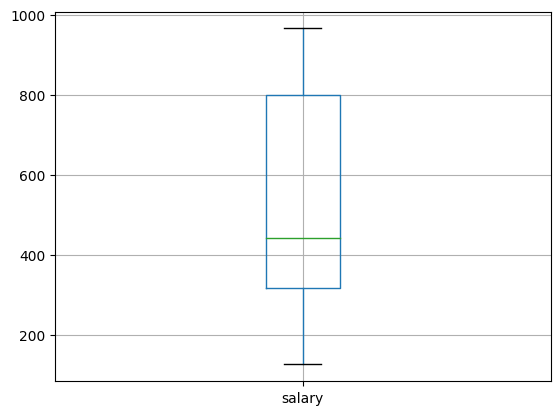

count     20.000000
mean     530.550000
std      276.579574
min      125.000000
25%      315.250000
50%      441.000000
75%      800.000000
max      966.000000
Name: salary, dtype: float64


In [26]:
# BOXPLOT

bloxplot = players.boxplot(column="salary") # aquí convierto mi columna en boxplot y luego printeo la descripción 
plt.show() # aquí veo el plot que he hecho


print(players["salary"].describe())

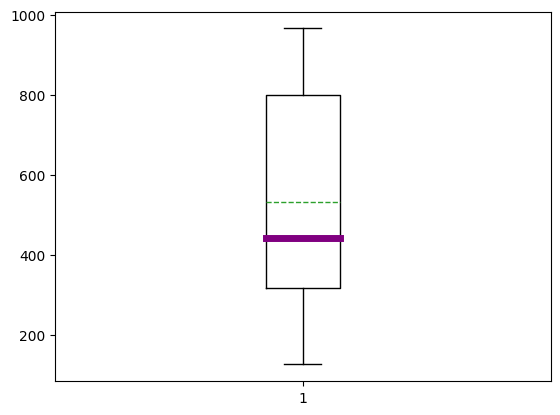

In [28]:
## con más variables en boxplot  -matplotlib

x = players["salary"]
fig, ax = plt.subplots()
ax.boxplot( x, 
            showmeans=True,
            meanline=True,
            medianprops={ "linewidth":5, "color": "purple"} ## vamos a poner una línea en la mediana y la vamos a señalar 
             )


plt.show() # aquí veo el plot que he hecho

          salary    rating
salary  1.000000  0.961275
rating  0.961275  1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_19344\992995850.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(players.corr(method="pearson"))


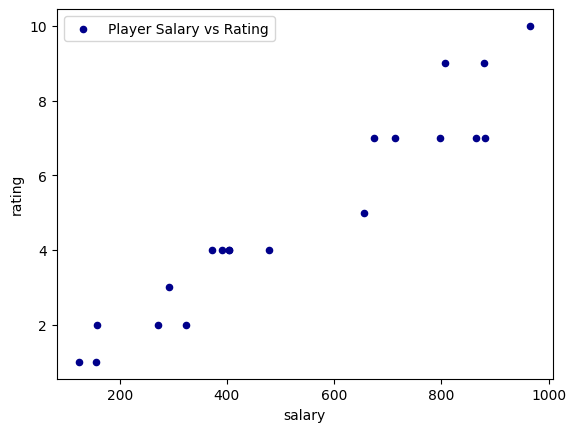

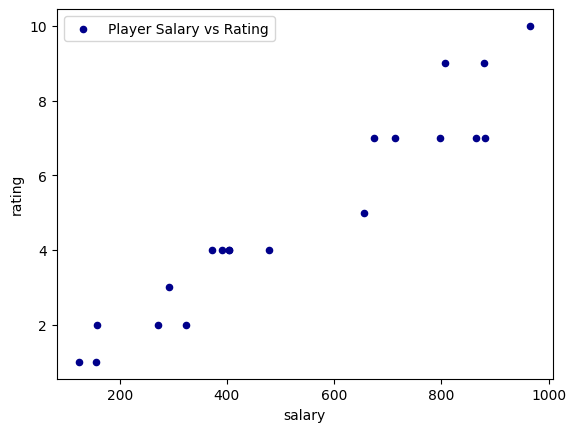

In [35]:
print(players.corr(method="pearson"))

ax = players.plot.scatter(x="salary", y="rating", 
                          color="DarkBlue", label="Player Salary vs Rating")

plt.show() 


4     5
7     5
2     3
1     2
9     2
3     1
5     1
10    1
Name: rating, dtype: int64
----------


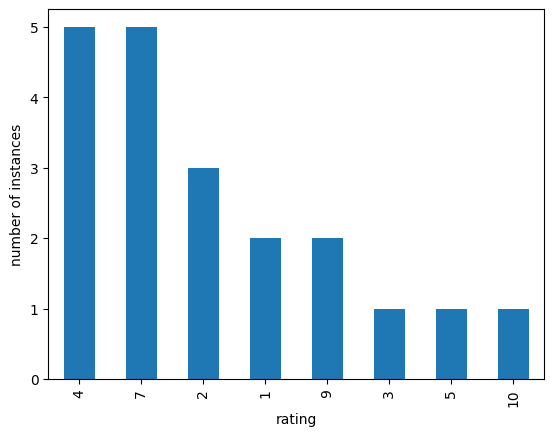

----------- .bar


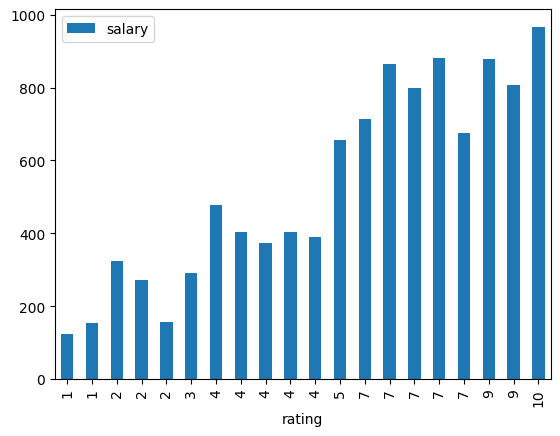

----------- .barh --- son diferentes bar de barh!!


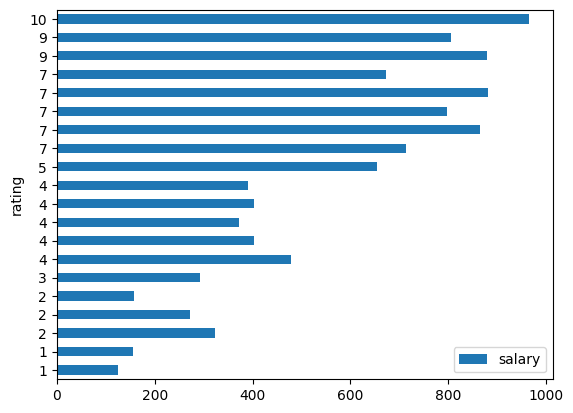

In [53]:
## Bar graph

ratingCount= players["rating"].value_counts()
print(ratingCount) # vemos que son bastante variados 
print("----------")
 


ratingCount.plot.bar()
plt.xlabel("rating")
plt.ylabel("number of instances")
plt.show()



print("----------- .bar"  )

ax = players.plot.bar(x="rating")
plt.show()


print("----------- .barh --- son diferentes bar de barh!!"  )

ax = players.plot.barh(x="rating")
plt.show()

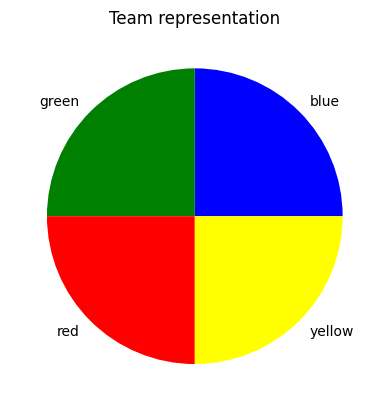

In [62]:
# pie chart

team_colors= {
    "red": "red",
    "blue": "blue",
    "green": "green",
    "yelow": "yellow"
}

team_counts = players.groupby("teams").size()
team_counts.plot(kind="pie",  colors=[team_colors.get(team,"yellow") for team in team_counts.index])

plt.title("Team representation")
plt.ylabel("")
plt.show()



LAST TASK - FINAL PROJECT

count    18522.000000
mean       153.998218
std        149.124299
min          0.000000
25%         94.000000
50%        128.000000
75%        180.000000
max       8000.000000
Name: price, dtype: float64


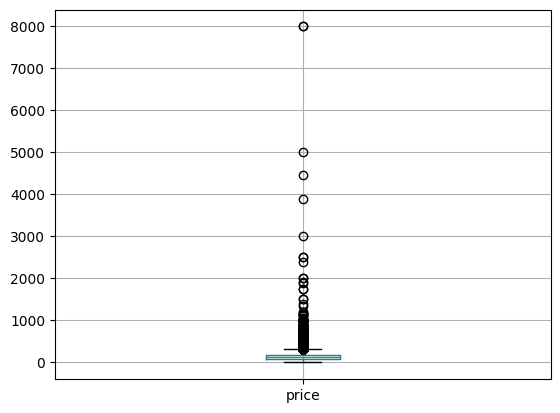

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
listings = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\Coursera - Intro to statistics Python\\listings.csv")

#print("head of the df\n", listings.head())
#print("------------------------------")

# prices and price boxplot
print(listings["price"].describe())

# boxplot 
listings.boxplot(column="price") # vemos que hay muchos outliers
plt.show()



minimum_nights       0.049182
number_of_reviews   -0.083182
reviews_per_month   -0.106022
dtype: float64
----------
number_of_reviews   -0.017005
price                0.049182
reviews_per_month   -0.025436
dtype: float64
----------
count               18522
unique                  4
top       Entire home/apt
freq                14433
Name: room_type, dtype: object


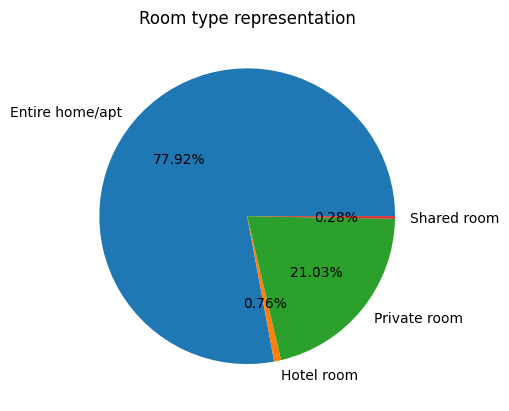

In [76]:

# buscar correlations entre diferentes variables y PRECIO
print(listings[["minimum_nights", "number_of_reviews", "reviews_per_month"]].corrwith(listings["price"]))

print("----------")

print(listings[["number_of_reviews", "price", "reviews_per_month"]].corrwith(listings["minimum_nights"]))


print("----------")
print(listings["room_type"].describe())


listings.groupby("room_type").size().plot(kind="pie", autopct="%1.2f%%") #autopct es para que me muestre los porcentajes, si pongo 1.0 es que no hay decimales, si pogo 1.1 es que hay un decimal, si pongo 1.2 es que hay dos decimales
plt.title("Room type representation")
plt.ylabel("")
plt.show()


# 

----------
                                      id   host_id  neighbourhood_group  \
id                              1.000000  0.524878                  NaN   
host_id                         0.524878  1.000000                  NaN   
neighbourhood_group                  NaN       NaN                  NaN   
latitude                        0.012937  0.008192                  NaN   
longitude                       0.017473  0.024236                  NaN   
price                          -0.006383 -0.027563                  NaN   
minimum_nights                 -0.034027 -0.025597                  NaN   
number_of_reviews              -0.278960 -0.110265                  NaN   
reviews_per_month               0.017067  0.116872                  NaN   
calculated_host_listings_count  0.086628 -0.004398                  NaN   
availability_365                0.044259  0.116783                  NaN   

                                latitude  longitude     price  minimum_nights  \
id     

C:\Users\User\AppData\Local\Temp\ipykernel_19344\3976993539.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation =listings.corr(method="pearson")


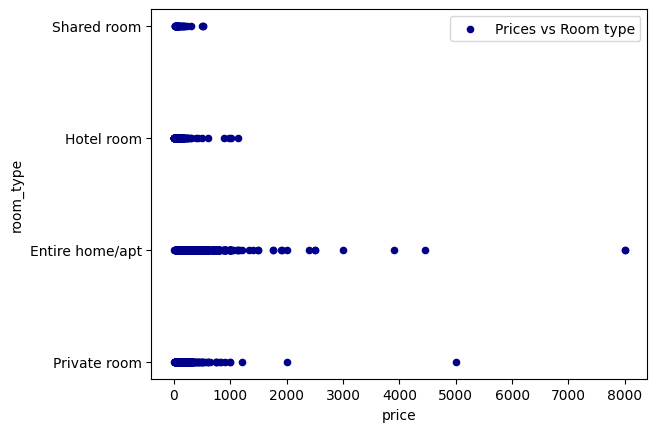

-------------------


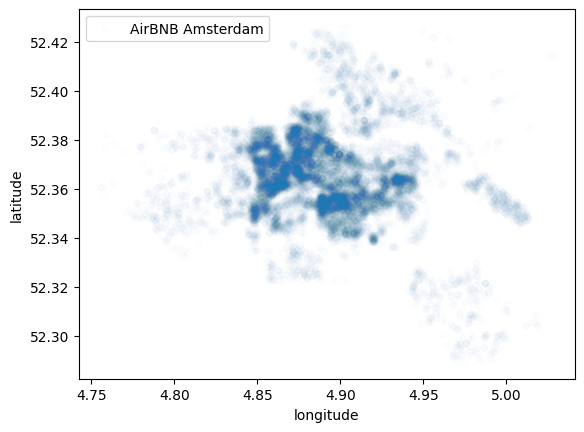

In [99]:
import csv 

print("----------")
correlation =listings.corr(method="pearson")
print(correlation)
# log uardo en .csv file
correlation.to_csv("C:\\Users\\User\\OneDrive\\Desktop\\Coursera - Intro to statistics Python\\correlation_results.csv")


print("-------------------")
ax = listings.plot.scatter(x="price", y="room_type", 
                          color="DarkBlue", label="Prices vs Room type")
plt.show() 


print("-------------------")
listings.plot.scatter(x="longitude", y="latitude", alpha=0.1, label="AirBNB Amsterdam") # alpha es para ver la transparencia de lospuntos, si subo, es más nítido, si bajo es más transparente
plt.show()
